# Práctica 2 — Proceso KDD aplicado al dataset COVID‑19  (Our World in Data)

**Carrera:** Ciencia de Datos 

**Asignatura:** Minería de Datos  

**Nombre del Alumno:** Luis Enrique Villalon Pineda

**Carrera de origen:** Actuaria

---
## Objetivos: 

1. Entender las fases del proceso KDD
2. Explorar cómo varió la tasa de vacunación para un país en particular (diferente a Italia)
3. Explorar cómo varió la tasa de vacunación de covid en América Latina durante los años de la pandemia
4. Identificar a los países con mayor tasa de vacunación (en América Latina)
5. Identificar las características de los países con mayor tasa de vacunación (en América Latina)


## Indicaciones generales

- Ejecuta **celda por celda**, leyendo primero los comentarios
- En las secciones marcadas como **(Experimenta)**, **(Modifica)** o **(Reflexiona)**, realiza lo que se pide y **deja tus conclusiones en texto**. Eres libre de modificar las celdas sin perder de vista el objetivo (puedes cambiar el estilo de visulizaciones o utilizar, por ejemplo seaborn o plotly).
- Deberás documentar todo el proceso, no olvides incluir los metadatos de los atributos que utilices
- Descarga el dataset `owid-covid-data.csv` desde el repositorio [Our World in Data GitHub]
(https://github.com/owid/covid-19-data/tree/master/public/data)

In [32]:
# ====== Librerías ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from pathlib import Path

## Paso 0 — Exploración del banco de datos y Entendimiento del dominio del negocio:

https://docs.owid.io/projects/covid/en/latest/dataset.html#the-data-you-find-here-and-our-data-sources

**Instrucciones:**
1. Carga el banco de datos
2. Explora el banco de datos completo: dimensión, cabecera, etc.
3. Despliega la estadística básica
4. Presenta la(s) visualización que consideres pertinente para comprender el problema y los datos
5. Busca el archivo con los metadatos del banco de datos 
6. Verifica que los metadatos coinciden con el tipo de dato que muestra el archivo
7. Muestra los campos que NO coinciden 

**Recuerda documentar** todas las decisiones que tomaste en el proceso


In [33]:
# === Parámetros (Modifica) ===
data_path = Path(r'.\owid-covid-data.csv')  # coloca el CSV en el mismo directorio

assert data_path.exists(), f'No se encontró el archivo: {data_path.resolve()}'
df = pd.read_csv(data_path, low_memory=False)

#2 Despliega la dimensión del data set completo: usa shape y head
df.shape

(429435, 67)

In [34]:
#2
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [35]:
# 3- Estadisticas basicas 
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [36]:
# !pip install skimpy

In [37]:
# 4 - Visualizacion
from skimpy import skim

skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 429435 │ │ float64     │ 61    │                                                          │
│ │ Number of columns │ 67     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA     ┃ NA %    ┃ mean    ┃ sd       ┃ p0     ┃ p25     ┃ p50     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ total_c │  17631 │ 4.10562 │ 7365000 │ 44780000 │      0 │    6281 │   63650 │   758300 │ 7759000 │   ▇    │  │
│ │ ases    │        │ 7161270 │         │          │        │         │         │          │      00 │        │  │
│ │         │        │     041 │         │          │        │         │         │          │         │        │  │
│ │ new_cas │  19276 │ 4.48868 │    8017 │   229700 │      0 │       0 │       0 │        0 │ 4424000 │   ▇    │  │
│ │ es      │        │ 8625752 │         │          │        │         │         │          │       0 │        │  │
│ │         │        │    4425 │         │          │        │         │         │          │         │        │  │
│ │ new_cas │  20506 │ 4.77511 │    8041 │    86620 │      0 │       0 │      12 │    313.3 │ 6319000 │   ▇    │  │
│ │ es_smoo │        │ 1483693 │         │          │        │         │         │          │         │        │  │
│ │ thed    │        │      69 │         │          │        │         │         │          │         │        │  │
│ │ total_d │  17631 │ 4.10562 │   81260 │   441200 │      0 │      43 │     799 │     9574 │ 7057000 │   ▇    │  │
│ │ eaths   │        │ 7161270 │         │          │        │         │         │          │         │        │  │
│ │         │        │     041 │         │          │        │         │         │          │         │        │  │
│ │ new_dea │  18827 │ 4.38413 │   71.85 │     1368 │      0 │       0 │       0 │        0 │  103700 │   ▇    │  │
│ │ ths     │        │ 2639398 │         │          │        │         │         │          │         │        │  │
│ │         │        │     279 │         │          │        │         │         │          │         │        │  │
│ │ new_dea │  20057 │ 4.67055 │   72.06 │    513.6 │      0 │       0 │       0 │     3.14 │   14820 │   ▇    │  │
│ │ ths_smo │        │ 5497339 │         │          │        │         │         │          │         │        │  │
│ │ othed   │        │     527 │         │          │        │         │         │          │         │        │  │
│ │ total_c │  17631 │ 4.10562 │  112100 │   162200 │      0 │    1916 │   29150 │   156800 │  763600 │  ▇▁▁▁  │  │
│ │ ases_pe │        │ 7161270 │         │          │        │         │         │          │         │        │  │
│ │ r_milli │        │     041 │         │          │        │         │         │          │         │        │  │
│ │ on      │        │         │         │          │   

In [38]:
#!pip install dataprep

In [39]:
# 5- Cargar Metadatos 
data_path = Path(r'.\owid-covid-codebook.csv')  

assert data_path.exists(), f'No se encontró el archivo: {data_path.resolve()}'
df_meta = pd.read_csv(data_path, low_memory=False)
df_meta.head(10)

,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country code...
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Dashboard by the WHO,Confirmed cases,Total confirmed cases of COVID-19. Counts can ...
5,new_cases,COVID-19 Dashboard by the WHO,Confirmed cases,New confirmed cases of COVID-19. Counts can in...
6,new_cases_smoothed,COVID-19 Dashboard by the WHO,Confirmed cases,New confirmed cases of COVID-19 (7-day smoothe...
7,total_deaths,COVID-19 Dashboard by the WHO,Confirmed deaths,Total deaths attributed to COVID-19. Counts ca...
8,new_deaths,COVID-19 Dashboard by the WHO,Confirmed deaths,New deaths attributed to COVID-19. Counts can ...
9,new_deaths_smoothed,COVID-19 Dashboard by the WHO,Confirmed deaths,New deaths attributed to COVID-19 (7-day smoot...


In [40]:
# 6 y 7 - Verificar Metadatos(columnas)
missing_in_df = df_meta[~df_meta['column'].isin(df.columns)]
print("Columnas delos metadatos que NO están en nuestros datos:")
display(missing_in_df)

Columnas delos metadatos que NO están en nuestros datos:


,column,source,category,description


## Fase 1 — Identificación de los datos relevantes

**Objetivo:** Definir el alcance del análisis y elegir subconjuntos/variables relevantes.

**Instrucciones:**
1. Selecciona un **país** objetivo para el análisis (`target_country`). Toma en cuenta que no todos los países tienen todas las variables; documenta supuestos y decisiones.

He seleccionado Estados Unidos ya  que, siendo una de las principales potencias mundiales, su respuesta a la pandemia resultó particularmente controversial. El análisis se basará en examinar la evolución de la pandemia y la efectividad de las medidas implementadas.
Objetivos del análisis:
1. Evolución temporal de la pandemia: Analizare la progresión de casos confirmados, muertes y hospitalizaciones a lo largo del tiempo para identificar las diferentes olas de contagio.
2. Impacto del sistema sanitario: Examinar la ocupación hospitalaria y de UCI para evaluar el colapso del sistema de salud mencionado inicialmente.
3. Efectividad de las políticas públicas: Correlacionar el índice de rigurosidad gubernamental con la evolución de casos y muertes para evaluar la efectividad de las medidas implementadas.
4. Análisis de vacunación: Estudiare el proceso de vacunación y su impacto en la reducción de casos y muertes.
5. Mortalidad excesiva: Evaluare el verdadero impacto de la pandemia mediante el análisis de la mortalidad excesiva comparada con años anteriores.

In [ ]:
target_country = 'United States'                 

2. Define un **rango de fechas** 


En base a: https://grok.com/share/c2hhcmQtMg%3D%3D_97b68925-08c1-4e0a-853a-6f25e12566d7 tomaremos el año de la pandemia del 20 de Enero del 2020 al 5 de Mayo del 2023

In [42]:
date_start = '2020-01-20'  
date_end   = '2023-05-05'

3. Elige variables de interés (mínimo: **casos** y **vacunación**; opcional: **UCI**, **pruebas**, **población**).

In [43]:
base_columns = [
    'date', 'location', 'total_cases', 'new_cases_smoothed',
    'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
    'total_deaths_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million', 
    'stringency_index', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
    'total_boosters_per_hundred', 'excess_mortality_cumulative', 'excess_mortality_cumulative_per_million', 
    'population', 'gdp_per_capita', 'hospital_beds_per_thousand'
]

4. Genera una tabla con los metadatos de las variables de interés

In [44]:
meta_base = df_meta[df_meta['column'].isin(base_columns)]
display(meta_base)

,column,source,category,description
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Dashboard by the WHO,Confirmed cases,Total confirmed cases of COVID-19. Counts can ...
6,new_cases_smoothed,COVID-19 Dashboard by the WHO,Confirmed cases,New confirmed cases of COVID-19 (7-day smoothe...
7,total_deaths,COVID-19 Dashboard by the WHO,Confirmed deaths,Total deaths attributed to COVID-19. Counts ca...
9,new_deaths_smoothed,COVID-19 Dashboard by the WHO,Confirmed deaths,New deaths attributed to COVID-19 (7-day smoot...
10,total_cases_per_million,COVID-19 Dashboard by the WHO,Confirmed cases,"Total confirmed cases of COVID-19 per 1,000,00..."
13,total_deaths_per_million,COVID-19 Dashboard by the WHO,Confirmed deaths,"Total deaths attributed to COVID-19 per 1,000,..."
20,hosp_patients_per_million,National government reports and European CDC,Hospital & ICU,Number of COVID-19 patients in hospital on a g...
22,weekly_icu_admissions_per_million,National government reports and European CDC,Hospital & ICU,Number of COVID-19 patients newly admitted to ...


5. Inserta en un nuevo chunk el código que necesites para completar las tareas

Dimensión tras selección por fechas y columnas: (309652, 19)
Registros de United States: 1202


,date,location,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,total_deaths_per_million,hosp_patients_per_million,weekly_icu_admissions_per_million,stringency_index,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,excess_mortality_cumulative,excess_mortality_cumulative_per_million,population,gdp_per_capita,hospital_beds_per_thousand
403466,2020-01-20,United States,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,338289856,54225.45,2.77
403467,2020-01-21,United States,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,338289856,54225.45,2.77
403468,2020-01-22,United States,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,338289856,54225.45,2.77
403469,2020-01-23,United States,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,338289856,54225.45,2.77
403470,2020-01-24,United States,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,338289856,54225.45,2.77


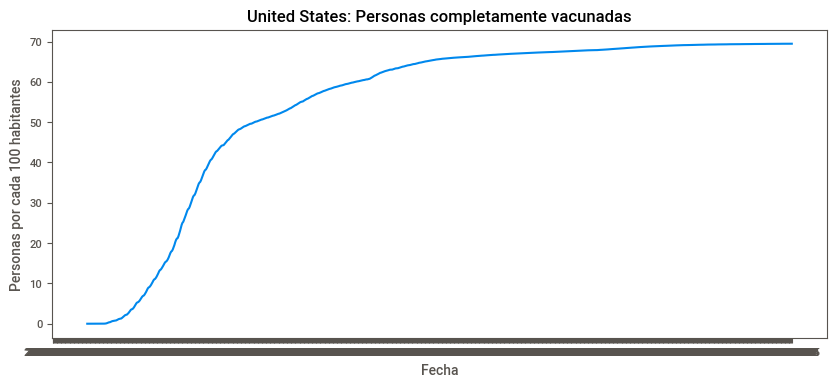

In [46]:
# Filtrado por fechas y columnas
df = df.loc[(df['date'] >= date_start) & (df['date'] <= date_end), base_columns].copy()
print('Dimensión tras selección por fechas y columnas:', df.shape)

# Dataset país objetivo
df_country = df.loc[df['location'] == target_country].copy()
print(f'Registros de {target_country}:', df_country.shape[0])
display(df_country.head())

plt.figure(figsize=(10,4))
plt.plot(df_country['date'], df_country['people_fully_vaccinated_per_hundred'])
plt.title(f'{target_country}: Personas completamente vacunadas')
plt.xlabel('Fecha'); plt.ylabel('Personas por cada 100 habitantes')
plt.show()

## Fase 2 — Limpieza de los datos

**Objetivo:** Detectar y tratar valores faltantes/inconsistencias. 

**Checklist:**
- [ ] ¿Existen columnas con alta proporción de NaN?, ¿Es necesario eliminarlas?
- [ ] ¿Existen variables con ceros estructurales (p. ej., antes del inicio de vacunación)?
- [ ] ¿Es razonable hacer una Interpolación/`ffill` para la variable de interés?
- [ ] Es necesario realizar algún otro tipo de preprocesamiento? Sí/no/por qué
- [ ] ¿Qué podemos hacer con los casos diarios?
- [ ] En caso de ser necesario, realiza cualquier otro tipo de preprocesamiento que consideres pertinente
- [ ] Documenta en una celda de **Markdown** tus decisiones y por qué.

/tmp/ipykernel_12399/818383705.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_country[col] = df_country[col].fillna(method='ffill')


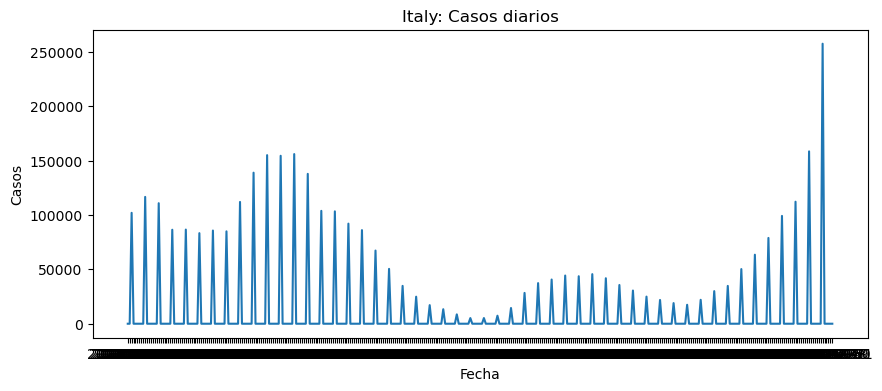

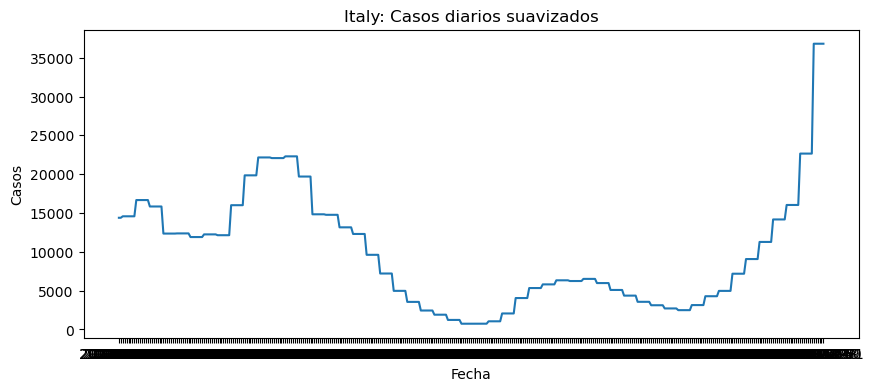

In [ ]:
# Exploración de valores faltantes

# Ejemplo: forward-fill para variables acumulativas/lentas
for col in ['people_vaccinated','people_fully_vaccinated','icu_patients']:
    if col in df_country.columns:
        df_country[col] = df_country[col].fillna(method='ffill')

# Ejemplo: reemplazo de NaN en casos suavizados con 0 (justifica esta decisión)
if 'new_cases_smoothed' in df_country.columns:
    df_country['new_cases_smoothed'] = df_country['new_cases_smoothed'].fillna(0)
    
# Casos diarios
plt.figure(figsize=(10,4))
plt.plot(df_country['date'], df_country['new_cases'])
plt.title(f'{target_country}: Casos diarios')
plt.xlabel('Fecha'); plt.ylabel('Casos')
plt.show()

# Casos diarios suavizados
plt.figure(figsize=(10,4))
plt.plot(df_country['date'], df_country['new_cases_smoothed'])
plt.title(f'{target_country}: Casos diarios suavizados')
plt.xlabel('Fecha'); plt.ylabel('Casos')
plt.show()

**Diario de decisiones (Preprocesamiento):**
- Describe qué columnas imputaste, con qué técnica y por qué.
- Señala riesgos de introducir sesgos (p. ej., rellenar con 0 vs interpolar).
- Indica qué filas/columnas eliminaste (si aplica) y el impacto esperado.

## Fase 3 — Transformación y reducción
**Objetivo:** Crear variables derivadas, transformar escalas para análisis posterior y reducir la dimensión del banco de datos

**Sugerencias de variables derivadas:**
- `cases_per_million_proxy = new_cases_smoothed / (population/1e6)`

**Checklist:**
- [ ] ¿Es necesario transformar algún tipo de dato? Sí/no/Por qué
- [ ] Definir qué variables necesito transformar y por qué
- [ ] Definir una forma de calcular la tasa de vacunación anual
- [ ] ¿Cuándo puedo utilizar `MinMaxScaler` o `StandardScaler`? Define el caso y justifica el por qué


In [ ]:
# Variables derivadas (Modifica/Extiende)
for col in ['people_fully_vaccinated','population','new_cases_smoothed']:
    assert col in df_country.columns, f'Columna faltante: {col}'
    
df_country['cases_per_million_proxy'] = df_country['new_cases_smoothed'] / (df_country['population'] / 1_000_000)

display(df_country.head())

,iso_code,continent,location,date,new_cases,new_cases_smoothed,people_vaccinated,people_fully_vaccinated,icu_patients,population,cases_per_million_proxy
185637,ITA,Europe,Italy,2021-01-01,0.0,14385.71,51939.0,NaN,2553.0,59037472,243.670833
185638,ITA,Europe,Italy,2021-01-02,0.0,14385.71,91012.0,NaN,2569.0,59037472,243.670833
185639,ITA,Europe,Italy,2021-01-03,102019.0,14574.14,126889.0,NaN,2583.0,59037472,246.862535
185640,ITA,Europe,Italy,2021-01-04,0.0,14574.14,196562.0,9.0,2579.0,59037472,246.862535
185641,ITA,Europe,Italy,2021-01-05,0.0,14574.14,276867.0,11.0,2569.0,59037472,246.862535


## Fase 4 — Minería de datos
**Objetivo:** Aplicar al menos una técnica de minería y **explicar** resultados.

### A) — Series de tiempo (correlaciones y picos)
- Correlación entre `new_cases_smoothed` y `people_fully_vaccinated` 
- Identificación de **picos** en casos (usa un umbral manual sencillo si no tienes librerías extra).

### B) — Clustering entre países (patrones de 2021)
- Construye una matriz país × fecha con una métrica comparable (p. ej., `delta_vaccinated_norm`).
- Aplica **K-Means** (parámetro **k** modificable) y calcula **Silhouette Score**.
- (Opcional) Prueba **DBSCAN** y comenta diferencias.

## A) correlaciones y picos (Experimenta)

Correlaciones (país objetivo):


,new_cases_smoothed,people_fully_vaccinated
new_cases_smoothed,1.000000,-0.342738
people_fully_vaccinated,-0.342738,1.000000


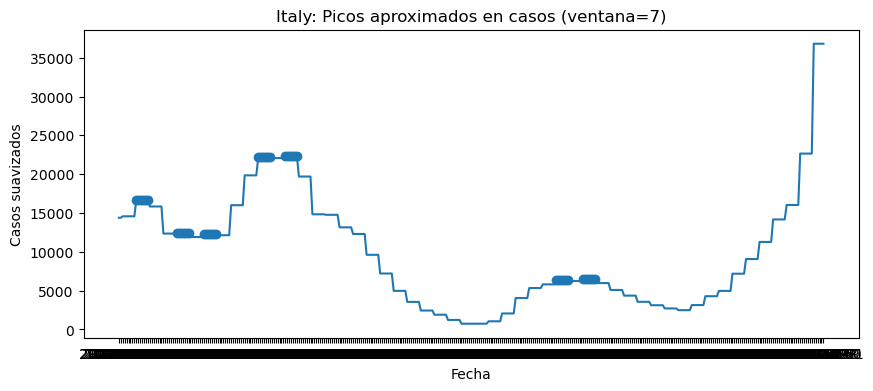

In [ ]:
corr = df_country[['new_cases_smoothed','people_fully_vaccinated']].corr()
print('Correlaciones (país objetivo):')
display(corr)

# Detección simple de picos en casos: valores locales mayores que vecinos
window = 7  # (Modifica)
series = df_country['new_cases_smoothed'].values
peaks_idx = []
for i in range(window, len(series)-window):
    if series[i] == max(series[i-window:i+window+1]) and series[i] > 0:
        peaks_idx.append(i)

plt.figure(figsize=(10,4))
plt.plot(df_country['date'], series)
plt.scatter(df_country['date'].iloc[peaks_idx], series[peaks_idx])
plt.title(f'{target_country}: Picos aproximados en casos (ventana={window})')
plt.xlabel('Fecha'); plt.ylabel('Casos suavizados')
plt.show()

## B) Clustering entre países para identificar las características similares entre los que tienen mayor tasa de vacunación (Desarrolla)

## Fase 5 — Evaluación e interpretación
**Objetivo:** Evaluar resultados con métricas y discutir **limitaciones**.

- Para clustering, reporta **Silhouette Score** y comenta si los grupos tienen **sentido**.
- Para series de tiempo, discute el **desfase temporal** entre vacunación y cambios en casos/uci.
- Señala **sesgos**: definición de caso, cambios de prueba, retrasos de reporte, diferencias demográficas.
- Presenta una tabla con la comparación en la tasa de vacunacion anual para todos los años de la pandemia
- Genera una gráfica que muestre cómo fue cambiando, a lo largo de la pandemia, el número de personas totalmente vacunadas 

### Reflexión (responde)
1. **Preprocesamiento:** ¿Qué estrategia de imputación funcionó mejor y por qué?
2. **Transformación:** ¿Qué variables derivadas aportaron mayor valor analítico?
3. **Minería:** ¿Cómo cambia el resultado al variar **k** (K-Means) o el **window** para picos?
4. **Evaluación:** ¿Qué valor arrojó Silhouette Score y cómo lo interpretas en este contexto?
5. **Limitaciones:** Enumera al menos **3** limitaciones del dataset o del enfoque utilizado.

## Reto

Con el banco de datos original, intenta obtener conocimiento extra sobre la relación vacunación/muertes o algún otro tema que consideres relevante (con las herramientas que conoces hasta ahora)